In [23]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt

In [24]:
def preprocess_image(image_path, image_size=(224, 224)):
    """Preprocesses an image for deep learning."""
    try:
        img = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, image_size)
        img = tf.image.convert_image_dtype(img, tf.float32)  # Convert to float32 and scale to [0, 1]
        img = tf.keras.applications.xception.preprocess_input(img)
        return img
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

In [25]:
# %%
def visualize_images(images, titles, rows=2, cols=4):
    """Visualizes a set of images with corresponding titles."""
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i])
        ax.set_title(titles[i])
    plt.tight_layout()
    plt.show()

In [26]:
# %%
def load_dataset(dataset_dir, split, batch_size=32, limit=None):
    """Loads a dataset from a directory structure."""
    image_paths = [os.path.join(dataset_dir, split, label, filename)
                   for label in ['Fake', 'Real']
                   for filename in os.listdir(os.path.join(dataset_dir, split, label))]
    labels = [1 if label == 'Fake' else 0 for label in [os.path.basename(path).split('_')[0] for path in image_paths]]

    if limit:
        image_paths = image_paths[:limit]
        labels = labels[:limit]

    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(lambda x, y: (preprocess_image(x), y))
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(1)

    return dataset

In [27]:
# %%
def main():
    dataset_dir = "../../dataset"
    train_dataset = load_dataset(dataset_dir, 'Train', batch_size=32, limit=10000)
    valid_dataset = load_dataset(dataset_dir, 'Validation', batch_size=32)

    # Print dataset information
    print("Dataset information:")
    print(f"- Total images: {len(train_dataset) + len(valid_dataset)}")
    print(f"- Train images: {len(train_dataset)}")
    print(f"- Valid images: {len(valid_dataset)}")

    # Visualize a few images from the training dataset
    for images, labels in train_dataset.take(1):
        # Convert tensors to numpy arrays for visualization
        images_np = images.numpy()
        labels_np = labels.numpy()
        
        # Normalize images to [0, 1] for visualization
        images_np = (images_np + 1.0) / 2.0
        
        # Create titles for each image
        titles = [f"Label: {'Fake' if label == 1 else 'Real'}" for label in labels_np]
        
        # Visualize images
        visualize_images(images_np, titles)

Dataset information:
- Total images: 1546
- Train images: 313
- Valid images: 1233


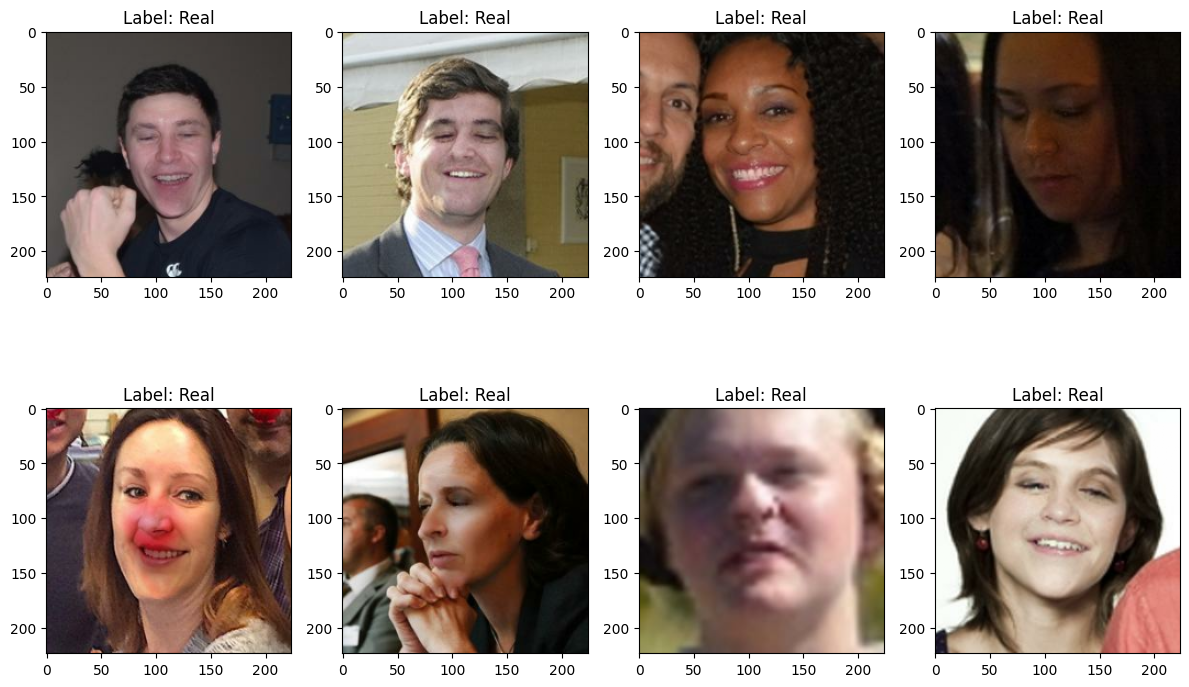

In [28]:
# %%
if __name__ == "__main__":
    main()